In [29]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

In [30]:
# Load the file
fs, x = wavfile.read('./files/example_file.wav')

/var/folders/lr/77q7001j7ts8dyg69j0vmc480000gn/T/ipykernel_22120/4120193255.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, x = wavfile.read('./files/example_file.wav')


In [31]:
# block size calculation
block = int(0.023 * fs)  # block = number of sample data in each block
n = len(x) // block

# truncate the signal to be an integer multiple of the block size
x = x[:block * n]

# Time array
t = np.arange(0, len(x)) / fs

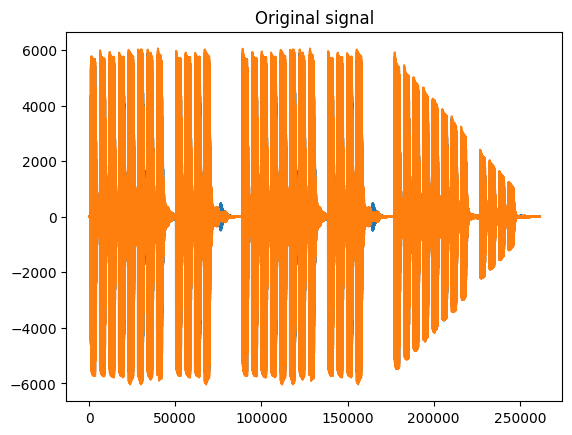

In [32]:
# plot the original signal
plt.figure()
plt.plot(x)
plt.title('Original signal')
plt.show()

[ 0  0  0 ...  2 -2  1]


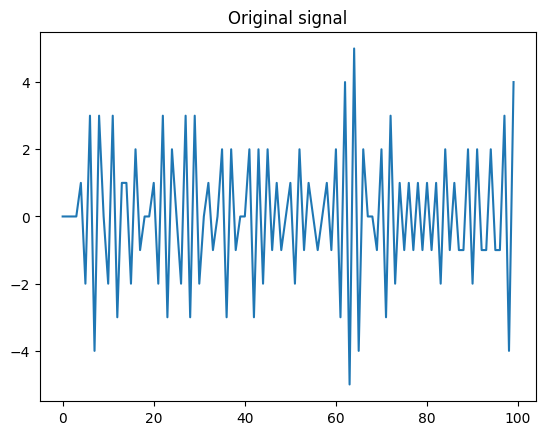

In [48]:
# Make it single channel 
audio = x[:,0]
print(audio)

# Plot small portion
plt.figure()
plt.plot(audio[:100])
plt.title('Original signal')
plt.show()

In [34]:
# Helper function to normalize the audio signal
def normalize(signal):
    return signal / np.max(np.abs(signal))


audio = normalize(audio)
print(audio)

[ 0.          0.          0.         ...  0.00033755 -0.00033755
  0.00016878]


Aliasing is an effect which occurs when the input frequency is half the sampling frequency

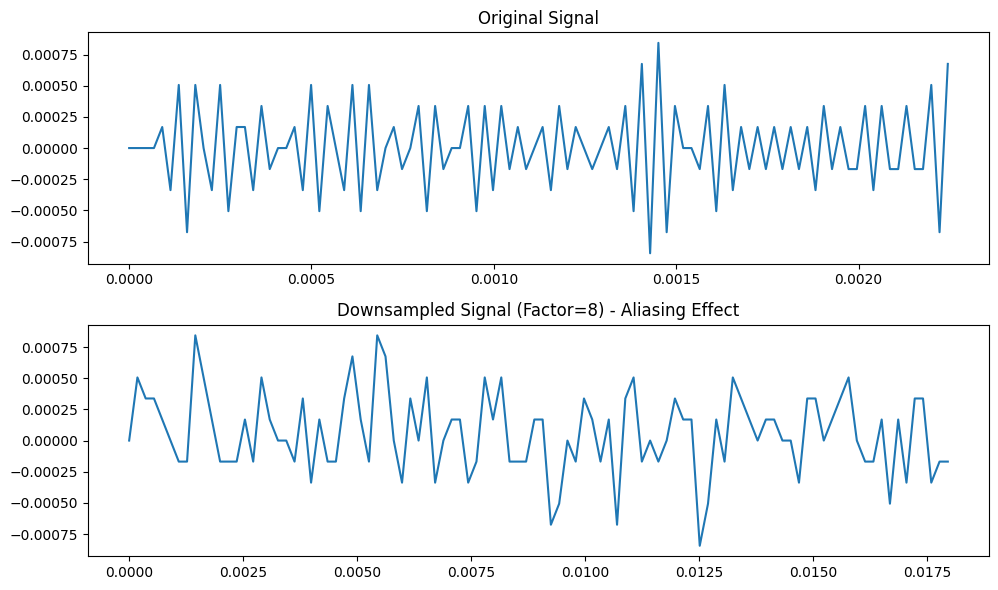

In [39]:
def downsample(signal, factor):
    return signal[::factor], fs // factor  # signal[::factor] means sampling after factor points


# Downsampling to create aliasing
downsample_factor = 8  # You can change this to experiment
downsampled_signal, downsampled_fs = downsample(audio, downsample_factor)
downsampled_t = np.arange(0, len(downsampled_signal)) / downsampled_fs

# Plot the original and downsampled signal
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t[:100], audio[:100])
plt.title('Original Signal')
plt.subplot(2, 1, 2)
plt.plot(downsampled_t[:100], downsampled_signal[:100])
plt.title(f'Downsampled Signal (Factor={downsample_factor}) - Aliasing Effect')
plt.tight_layout()
plt.show()

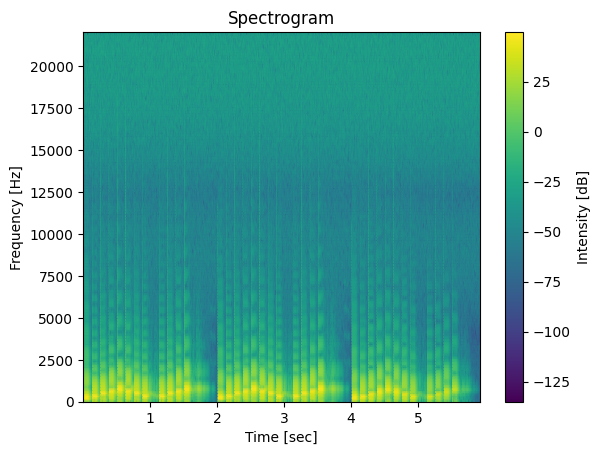

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import spectrogram

# Step 1: Read the audio file
# fs, data = wavfile.read('./files/example_file.wav')

# Step 2: Compute the spectrogram
frequencies, times, Sxx = spectrogram(audio, fs)

# Step 3: Plot the spectrogram
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram')
plt.colorbar(label='Intensity [dB]')
plt.show()